In [1]:
import os
import sys
from collections import OrderedDict

In [2]:
sys.path.append("../..")

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import spatialpy
spatialpy.__file__

'../../spatialpy/__init__.py'

In [5]:
import matplotlib.pyplot as plt
import numpy

# Global Constants
MAX_X_DIM = 5.0
MIN_X_DIM = -5.0
TOL = 1e-9

In [6]:
class Edge1(spatialpy.SubDomain):
    def inside(self, x, on_boundary):
        return abs(x[0] - MAX_X_DIM) < 0.05
class Edge2(spatialpy.SubDomain):
    def inside(self, x, on_boundary):
        return abs(x[0] - MIN_X_DIM) < 0.05


In [7]:
class cylinderDemo3D(spatialpy.Model):
    def __init__(self, model_name="cylinder_demo3d"):
        spatialpy.Model.__init__(self, model_name)

        # System constants
        D_const = 0.1

        # Define Species
        A = spatialpy.Species(name="A", diffusion_constant=D_const)
        B = spatialpy.Species(name="B", diffusion_constant=D_const)
        self.add_species([A, B])

        # Define Geometry
        self.mesh = spatialpy.Mesh.read_xml_mesh('cylinder.xml')

        # Define Subdomains
        self.add_subdomain(Edge1(), 2)
        self.add_subdomain(Edge2(), 3)
        
        # Restrict the movement of Chemical Species
        self.restrict(A,[1,2])
        self.restrict(B,[1,3])

        vol = self.mesh.get_vol()
        print("vol",vol)
        sd = self.mesh.sd
        left = numpy.sum(vol[sd == 2])
        right = numpy.sum(vol[sd == 3])
        print("left "+str(left)+" right "+str(right))
        
        k_react = spatialpy.Parameter(name="k_react", expression=1.0)
        k_creat1 = spatialpy.Parameter(name="k_creat1", 
                                     expression=100/left)
        k_creat2 = spatialpy.Parameter(name="k_creat2", 
                                     expression=100/right)
        self.add_parameter([k_react, k_creat1,k_creat2])


        # Define Reactions
        R1 = spatialpy.Reaction(reactants=None, products={A:1}, 
                                rate=k_creat1, restrict_to=2)
        R2 = spatialpy.Reaction(reactants=None, products={B:1}, 
                              rate=k_creat2, restrict_to=3)
        R3 = spatialpy.Reaction(reactants={A:1, B:1}, products=None, 
                              rate=k_react)
        self.add_reaction([R1, R2, R3])

        # Define simulation timespan
        #self.set_timesteps(1, 200)
        self.timespan(range(500))

In [8]:
model = cylinderDemo3D()

vol [0.01513526 0.07034112 0.02382667 ... 0.01674217 0.02120607 0.01969156]
left 0.5092013833059308 right 0.505804729089437


In [9]:
model.listOfReactions

OrderedDict([('rxnfe0d95bb_d7ed_418a_b24b_6b24b230c1fc',
              <spatialpy.Model.Reaction at 0x7f929c277490>),
             ('rxnca5640a8_e727_486b_9a1f_333564ce8141',
              <spatialpy.Model.Reaction at 0x7f929c277400>),
             ('rxne8a3d407_b8e6_4f00_afac_535ddec9bbc9',
              <spatialpy.Model.Reaction at 0x7f929c277610>)])

In [10]:
from spatialpy.nsmsolver import NSMSolver

In [11]:
#result = model.run(report_level=2)
sol = NSMSolver(model, debug_level=2)
sol.h = 0.8
print("h="+str(sol.h))
%time sol.compile()

h=0.8
Compiling Solver.  Build dir: /tmp/spatialpy_build_pti8w01w
Creating propensity file /tmp/spatialpy_build_pti8w01w/cylinder_demo3d_generated_model.c
cmd: cd /tmp/spatialpy_build_pti8w01w ; make -f /home/brian/Desktop/research/SpatialPy/spatialpy/ssa_sdpd-c-simulation-engine/build/Makefile.nsm ROOT=/home/brian/Desktop/research/SpatialPy/spatialpy/ssa_sdpd-c-simulation-engine MODEL=/tmp/spatialpy_build_pti8w01w/cylinder_demo3d_generated_model.c BUILD=/tmp/spatialpy_build_pti8w01w

gcc -c -o linked_list.o /home/brian/Desktop/research/SpatialPy/spatialpy/ssa_sdpd-c-simulation-engine/src/linked_list.c -I/home/brian/Desktop/research/SpatialPy/spatialpy/ssa_sdpd-c-simulation-engine/include/ -O3 -Wall 
gcc -c -o particle.o /home/brian/Desktop/research/SpatialPy/spatialpy/ssa_sdpd-c-simulation-engine/src/particle.c -I/home/brian/Desktop/research/SpatialPy/spatialpy/ssa_sdpd-c-simulation-engine/include/ -O3 -Wall 
gcc -c -o simulate.o /home/brian/Desktop/research/SpatialPy/spatialpy/ssa_sd

In [12]:
%time result = sol.run()

cmd: cd /tmp/spatialpy_result_ujl58beq;/tmp/spatialpy_build_pti8w01w/ssa_sdpd

Elapsed seconds: 2.08
*************** initialize_rdme ******************
Creating thread to process 132 particles
Creating thread to process 132 particles
[WORKER 0] waiting to begin step 0
Creating thread to process 132 particles
[WORKER 1] waiting to begin step 0
Creating thread to process 132 particles
Creating thread to process 132 particles
[WORKER 2] waiting to begin step 0
Creating thread to process 132 particles
[WORKER 3] waiting to begin step 0
Creating thread to process 132 particles
Creating thread to process 135 particles
[WORKER 5] waiting to begin step 0
Creating thread to update x-position index
[WORKER 7] waiting to begin step 0
[WORKER 6] waiting to begin step 0
Creating thread to create output files
[0] Starting the Sort Index threads
[WORKER 4] waiting to begin step 0
[SORT] begin sort
[0] Starting the Output threads
[OUT] start output_vtk__sync_step()
[OUT] done output_vtk__sync_step()
[

read_step(0) opening '/tmp/spatialpy_result_ujl58beq/output0.vtk'
read_step(1) opening '/tmp/spatialpy_result_ujl58beq/output1.vtk'
read_step(2) opening '/tmp/spatialpy_result_ujl58beq/output2.vtk'
read_step(3) opening '/tmp/spatialpy_result_ujl58beq/output3.vtk'
read_step(4) opening '/tmp/spatialpy_result_ujl58beq/output4.vtk'
read_step(5) opening '/tmp/spatialpy_result_ujl58beq/output5.vtk'
read_step(6) opening '/tmp/spatialpy_result_ujl58beq/output6.vtk'
read_step(7) opening '/tmp/spatialpy_result_ujl58beq/output7.vtk'
read_step(8) opening '/tmp/spatialpy_result_ujl58beq/output8.vtk'
read_step(9) opening '/tmp/spatialpy_result_ujl58beq/output9.vtk'
read_step(10) opening '/tmp/spatialpy_result_ujl58beq/output10.vtk'
read_step(11) opening '/tmp/spatialpy_result_ujl58beq/output11.vtk'
read_step(12) opening '/tmp/spatialpy_result_ujl58beq/output12.vtk'
read_step(13) opening '/tmp/spatialpy_result_ujl58beq/output13.vtk'
read_step(14) opening '/tmp/spatialpy_result_ujl58beq/output14.vtk'


read_step(169) opening '/tmp/spatialpy_result_ujl58beq/output169.vtk'
read_step(170) opening '/tmp/spatialpy_result_ujl58beq/output170.vtk'
read_step(171) opening '/tmp/spatialpy_result_ujl58beq/output171.vtk'
read_step(172) opening '/tmp/spatialpy_result_ujl58beq/output172.vtk'
read_step(173) opening '/tmp/spatialpy_result_ujl58beq/output173.vtk'
read_step(174) opening '/tmp/spatialpy_result_ujl58beq/output174.vtk'
read_step(175) opening '/tmp/spatialpy_result_ujl58beq/output175.vtk'
read_step(176) opening '/tmp/spatialpy_result_ujl58beq/output176.vtk'
read_step(177) opening '/tmp/spatialpy_result_ujl58beq/output177.vtk'
read_step(178) opening '/tmp/spatialpy_result_ujl58beq/output178.vtk'
read_step(179) opening '/tmp/spatialpy_result_ujl58beq/output179.vtk'
read_step(180) opening '/tmp/spatialpy_result_ujl58beq/output180.vtk'
read_step(181) opening '/tmp/spatialpy_result_ujl58beq/output181.vtk'
read_step(182) opening '/tmp/spatialpy_result_ujl58beq/output182.vtk'
read_step(183) openi

read_step(341) opening '/tmp/spatialpy_result_ujl58beq/output341.vtk'
read_step(342) opening '/tmp/spatialpy_result_ujl58beq/output342.vtk'
read_step(343) opening '/tmp/spatialpy_result_ujl58beq/output343.vtk'
read_step(344) opening '/tmp/spatialpy_result_ujl58beq/output344.vtk'
read_step(345) opening '/tmp/spatialpy_result_ujl58beq/output345.vtk'
read_step(346) opening '/tmp/spatialpy_result_ujl58beq/output346.vtk'
read_step(347) opening '/tmp/spatialpy_result_ujl58beq/output347.vtk'
read_step(348) opening '/tmp/spatialpy_result_ujl58beq/output348.vtk'
read_step(349) opening '/tmp/spatialpy_result_ujl58beq/output349.vtk'
read_step(350) opening '/tmp/spatialpy_result_ujl58beq/output350.vtk'
read_step(351) opening '/tmp/spatialpy_result_ujl58beq/output351.vtk'
read_step(352) opening '/tmp/spatialpy_result_ujl58beq/output352.vtk'
read_step(353) opening '/tmp/spatialpy_result_ujl58beq/output353.vtk'
read_step(354) opening '/tmp/spatialpy_result_ujl58beq/output354.vtk'
read_step(355) openi

read_step(14) opening '/tmp/spatialpy_result_ujl58beq/output14.vtk'
read_step(15) opening '/tmp/spatialpy_result_ujl58beq/output15.vtk'
read_step(16) opening '/tmp/spatialpy_result_ujl58beq/output16.vtk'
read_step(17) opening '/tmp/spatialpy_result_ujl58beq/output17.vtk'
read_step(18) opening '/tmp/spatialpy_result_ujl58beq/output18.vtk'
read_step(19) opening '/tmp/spatialpy_result_ujl58beq/output19.vtk'
read_step(20) opening '/tmp/spatialpy_result_ujl58beq/output20.vtk'
read_step(21) opening '/tmp/spatialpy_result_ujl58beq/output21.vtk'
read_step(22) opening '/tmp/spatialpy_result_ujl58beq/output22.vtk'
read_step(23) opening '/tmp/spatialpy_result_ujl58beq/output23.vtk'
read_step(24) opening '/tmp/spatialpy_result_ujl58beq/output24.vtk'
read_step(25) opening '/tmp/spatialpy_result_ujl58beq/output25.vtk'
read_step(26) opening '/tmp/spatialpy_result_ujl58beq/output26.vtk'
read_step(27) opening '/tmp/spatialpy_result_ujl58beq/output27.vtk'
read_step(28) opening '/tmp/spatialpy_result_ujl

read_step(187) opening '/tmp/spatialpy_result_ujl58beq/output187.vtk'
read_step(188) opening '/tmp/spatialpy_result_ujl58beq/output188.vtk'
read_step(189) opening '/tmp/spatialpy_result_ujl58beq/output189.vtk'
read_step(190) opening '/tmp/spatialpy_result_ujl58beq/output190.vtk'
read_step(191) opening '/tmp/spatialpy_result_ujl58beq/output191.vtk'
read_step(192) opening '/tmp/spatialpy_result_ujl58beq/output192.vtk'
read_step(193) opening '/tmp/spatialpy_result_ujl58beq/output193.vtk'
read_step(194) opening '/tmp/spatialpy_result_ujl58beq/output194.vtk'
read_step(195) opening '/tmp/spatialpy_result_ujl58beq/output195.vtk'
read_step(196) opening '/tmp/spatialpy_result_ujl58beq/output196.vtk'
read_step(197) opening '/tmp/spatialpy_result_ujl58beq/output197.vtk'
read_step(198) opening '/tmp/spatialpy_result_ujl58beq/output198.vtk'
read_step(199) opening '/tmp/spatialpy_result_ujl58beq/output199.vtk'
read_step(200) opening '/tmp/spatialpy_result_ujl58beq/output200.vtk'
read_step(201) openi

read_step(356) opening '/tmp/spatialpy_result_ujl58beq/output356.vtk'
read_step(357) opening '/tmp/spatialpy_result_ujl58beq/output357.vtk'
read_step(358) opening '/tmp/spatialpy_result_ujl58beq/output358.vtk'
read_step(359) opening '/tmp/spatialpy_result_ujl58beq/output359.vtk'
read_step(360) opening '/tmp/spatialpy_result_ujl58beq/output360.vtk'
read_step(361) opening '/tmp/spatialpy_result_ujl58beq/output361.vtk'
read_step(362) opening '/tmp/spatialpy_result_ujl58beq/output362.vtk'
read_step(363) opening '/tmp/spatialpy_result_ujl58beq/output363.vtk'
read_step(364) opening '/tmp/spatialpy_result_ujl58beq/output364.vtk'
read_step(365) opening '/tmp/spatialpy_result_ujl58beq/output365.vtk'
read_step(366) opening '/tmp/spatialpy_result_ujl58beq/output366.vtk'
read_step(367) opening '/tmp/spatialpy_result_ujl58beq/output367.vtk'
read_step(368) opening '/tmp/spatialpy_result_ujl58beq/output368.vtk'
read_step(369) opening '/tmp/spatialpy_result_ujl58beq/output369.vtk'
read_step(370) openi

read_step(28) opening '/tmp/spatialpy_result_ujl58beq/output28.vtk'
read_step(29) opening '/tmp/spatialpy_result_ujl58beq/output29.vtk'
read_step(30) opening '/tmp/spatialpy_result_ujl58beq/output30.vtk'
read_step(31) opening '/tmp/spatialpy_result_ujl58beq/output31.vtk'
read_step(32) opening '/tmp/spatialpy_result_ujl58beq/output32.vtk'
read_step(33) opening '/tmp/spatialpy_result_ujl58beq/output33.vtk'
read_step(34) opening '/tmp/spatialpy_result_ujl58beq/output34.vtk'
read_step(35) opening '/tmp/spatialpy_result_ujl58beq/output35.vtk'
read_step(36) opening '/tmp/spatialpy_result_ujl58beq/output36.vtk'
read_step(37) opening '/tmp/spatialpy_result_ujl58beq/output37.vtk'
read_step(38) opening '/tmp/spatialpy_result_ujl58beq/output38.vtk'
read_step(39) opening '/tmp/spatialpy_result_ujl58beq/output39.vtk'
read_step(40) opening '/tmp/spatialpy_result_ujl58beq/output40.vtk'
read_step(41) opening '/tmp/spatialpy_result_ujl58beq/output41.vtk'
read_step(42) opening '/tmp/spatialpy_result_ujl

read_step(206) opening '/tmp/spatialpy_result_ujl58beq/output206.vtk'
read_step(207) opening '/tmp/spatialpy_result_ujl58beq/output207.vtk'
read_step(208) opening '/tmp/spatialpy_result_ujl58beq/output208.vtk'
read_step(209) opening '/tmp/spatialpy_result_ujl58beq/output209.vtk'
read_step(210) opening '/tmp/spatialpy_result_ujl58beq/output210.vtk'
read_step(211) opening '/tmp/spatialpy_result_ujl58beq/output211.vtk'
read_step(212) opening '/tmp/spatialpy_result_ujl58beq/output212.vtk'
read_step(213) opening '/tmp/spatialpy_result_ujl58beq/output213.vtk'
read_step(214) opening '/tmp/spatialpy_result_ujl58beq/output214.vtk'
read_step(215) opening '/tmp/spatialpy_result_ujl58beq/output215.vtk'
read_step(216) opening '/tmp/spatialpy_result_ujl58beq/output216.vtk'
read_step(217) opening '/tmp/spatialpy_result_ujl58beq/output217.vtk'
read_step(218) opening '/tmp/spatialpy_result_ujl58beq/output218.vtk'
read_step(219) opening '/tmp/spatialpy_result_ujl58beq/output219.vtk'
read_step(220) openi

read_step(380) opening '/tmp/spatialpy_result_ujl58beq/output380.vtk'
read_step(381) opening '/tmp/spatialpy_result_ujl58beq/output381.vtk'
read_step(382) opening '/tmp/spatialpy_result_ujl58beq/output382.vtk'
read_step(383) opening '/tmp/spatialpy_result_ujl58beq/output383.vtk'
read_step(384) opening '/tmp/spatialpy_result_ujl58beq/output384.vtk'
read_step(385) opening '/tmp/spatialpy_result_ujl58beq/output385.vtk'
read_step(386) opening '/tmp/spatialpy_result_ujl58beq/output386.vtk'
read_step(387) opening '/tmp/spatialpy_result_ujl58beq/output387.vtk'
read_step(388) opening '/tmp/spatialpy_result_ujl58beq/output388.vtk'
read_step(389) opening '/tmp/spatialpy_result_ujl58beq/output389.vtk'
read_step(390) opening '/tmp/spatialpy_result_ujl58beq/output390.vtk'
read_step(391) opening '/tmp/spatialpy_result_ujl58beq/output391.vtk'
read_step(392) opening '/tmp/spatialpy_result_ujl58beq/output392.vtk'
read_step(393) opening '/tmp/spatialpy_result_ujl58beq/output393.vtk'
read_step(394) openi

read_step(54) opening '/tmp/spatialpy_result_ujl58beq/output54.vtk'
read_step(55) opening '/tmp/spatialpy_result_ujl58beq/output55.vtk'
read_step(56) opening '/tmp/spatialpy_result_ujl58beq/output56.vtk'
read_step(57) opening '/tmp/spatialpy_result_ujl58beq/output57.vtk'
read_step(58) opening '/tmp/spatialpy_result_ujl58beq/output58.vtk'
read_step(59) opening '/tmp/spatialpy_result_ujl58beq/output59.vtk'
read_step(60) opening '/tmp/spatialpy_result_ujl58beq/output60.vtk'
read_step(61) opening '/tmp/spatialpy_result_ujl58beq/output61.vtk'
read_step(62) opening '/tmp/spatialpy_result_ujl58beq/output62.vtk'
read_step(63) opening '/tmp/spatialpy_result_ujl58beq/output63.vtk'
read_step(64) opening '/tmp/spatialpy_result_ujl58beq/output64.vtk'
read_step(65) opening '/tmp/spatialpy_result_ujl58beq/output65.vtk'
read_step(66) opening '/tmp/spatialpy_result_ujl58beq/output66.vtk'
read_step(67) opening '/tmp/spatialpy_result_ujl58beq/output67.vtk'
read_step(68) opening '/tmp/spatialpy_result_ujl

read_step(230) opening '/tmp/spatialpy_result_ujl58beq/output230.vtk'
read_step(231) opening '/tmp/spatialpy_result_ujl58beq/output231.vtk'
read_step(232) opening '/tmp/spatialpy_result_ujl58beq/output232.vtk'
read_step(233) opening '/tmp/spatialpy_result_ujl58beq/output233.vtk'
read_step(234) opening '/tmp/spatialpy_result_ujl58beq/output234.vtk'
read_step(235) opening '/tmp/spatialpy_result_ujl58beq/output235.vtk'
read_step(236) opening '/tmp/spatialpy_result_ujl58beq/output236.vtk'
read_step(237) opening '/tmp/spatialpy_result_ujl58beq/output237.vtk'
read_step(238) opening '/tmp/spatialpy_result_ujl58beq/output238.vtk'
read_step(239) opening '/tmp/spatialpy_result_ujl58beq/output239.vtk'
read_step(240) opening '/tmp/spatialpy_result_ujl58beq/output240.vtk'
read_step(241) opening '/tmp/spatialpy_result_ujl58beq/output241.vtk'
read_step(242) opening '/tmp/spatialpy_result_ujl58beq/output242.vtk'
read_step(243) opening '/tmp/spatialpy_result_ujl58beq/output243.vtk'
read_step(244) openi

read_step(349) opening '/tmp/spatialpy_result_ujl58beq/output349.vtk'
read_step(350) opening '/tmp/spatialpy_result_ujl58beq/output350.vtk'
read_step(351) opening '/tmp/spatialpy_result_ujl58beq/output351.vtk'
read_step(352) opening '/tmp/spatialpy_result_ujl58beq/output352.vtk'
read_step(353) opening '/tmp/spatialpy_result_ujl58beq/output353.vtk'
read_step(354) opening '/tmp/spatialpy_result_ujl58beq/output354.vtk'
read_step(355) opening '/tmp/spatialpy_result_ujl58beq/output355.vtk'
read_step(356) opening '/tmp/spatialpy_result_ujl58beq/output356.vtk'
read_step(357) opening '/tmp/spatialpy_result_ujl58beq/output357.vtk'
read_step(358) opening '/tmp/spatialpy_result_ujl58beq/output358.vtk'
read_step(359) opening '/tmp/spatialpy_result_ujl58beq/output359.vtk'
read_step(360) opening '/tmp/spatialpy_result_ujl58beq/output360.vtk'
read_step(361) opening '/tmp/spatialpy_result_ujl58beq/output361.vtk'
read_step(362) opening '/tmp/spatialpy_result_ujl58beq/output362.vtk'
read_step(363) openi

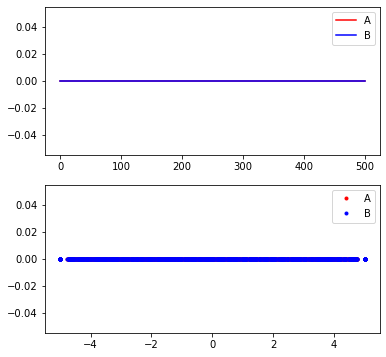

In [20]:
# Plot of the time-average spatial concentration.
x_vals = model.mesh.coordinates()[:, 0]
A_vals = numpy.sum(result.get_species("A", concentration=False), axis=0)
B_vals = numpy.sum(result.get_species("B", concentration=False), axis=0)

A_sum = numpy.sum(result.get_species("A"), axis=1)
B_sum = numpy.sum(result.get_species("B"), axis=1)
print(A_sum[-1])
print(B_sum[-1])
plt.figure(figsize=(6,6))
plt.subplot(2,1,1)
plt.plot(result.get_timespan(),A_sum,'-r',label="A")
plt.plot(result.get_timespan(),B_sum,'-b',label="B")
plt.legend(loc='best')
plt.subplot(2,1,2)

vol = model.mesh.vol
sd = model.mesh.sd
print(numpy.sum(vol[sd == 2]))
print(numpy.sum(vol[sd == 3]))


plt.plot(x_vals,A_vals,'.r',x_vals,B_vals,'.b')
plt.legend(['A', 'B'],loc='best')


In [ ]:
def plot_step(t_ndx,key='type'):
    pts, data = result.read_step(t_ndx)
    plt.figure(figsize=(15,10) )
    plt.scatter(pts[:,0],pts[:,1],c=data[key])
    plt.axis('equal')
    plt.colorbar()
    plt.title('t={0}'.format(t_ndx))

In [ ]:
plot_step(0)

In [ ]:
plot_step(2,'C[A]')

In [ ]:
plot_step(2,'D[A]')

In [ ]:
model.staticDomain